# Лабораторная работа №4

ФИО:   
Группа:

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №8 в семестре (Занятие №4 очное)

Что необходимо сделать:  
- Обучить различные модели глубокого обучения на имеющихся данных  

---
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/1k2MYXEp_OVQrink_XRC1PwoM0ZuNMeNz4VTWY7cI3hE/edit?usp=sharing) необходимо узнать название своего датасета
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1Phm-Fq1GL-VX7NS-DCEMRh_Fo1wU7DQ9?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. Загрузить необходимые данные к себе и считать (read) их в переменную.
2. Понять, у вас задача классификации (бинарной или многоклассовой) или регрессии.
3. Сделать предобработку данных:  
     1. Разделить выборку на тренировочную (train) и тестовую (test). _Обратите внимание, что обучать скейлеры и определять, какими значениями вы будете заполнять пропуски, вы будете на train выборке, а применять и на train, и на test_.
     2. Проверить пропуски в данных. Если они есть, заполнить одной из стратегий, предложенных в ноутбуке для семинара №3. P.S. Для численных и категориальных переменных будут разные стратегии.
     3. Отнормировать численные переменные (`StandardScaler`, `MinMaxScaler`).
     4. Закодировать категориальные признаки по одной из стратегий.
4. Оформить данные в виде класса `Dataset` из библиотеки `torch` (как мы это делали на семинаре), а затем засунуть в `Dataloader` (тоже делали на семинаре).
5. Обучить на тренировочном множестве:
     1. Очень простую однослойную нейросеть с оптимизатором `SGD` ([link](https://pytorch.org/docs/stable/optim.html)).
     2. Нейросеть посложнее (с 1 скрытым слоем) с оптимизатором `Adam` ([link](https://pytorch.org/docs/stable/optim.html)).
     3. Нейросеть еще сложнее (с 3+ скрытыми слоями) с оптимизатором `Adam` ([link](https://pytorch.org/docs/stable/optim.html)).
6. Посчитайте loss на train и test множествах, в зависимости от эпохи обучения. Провизуализируйте это с помощью библиотеки `matplotlib` (выйдет так называемая **learning curve**, кривая обучения модели).
6. Посчитайте метрики на train и test множествах:
     1. Для задачи классификации -- Accuracy
     2. Для задачи регрессии -- MAE
7. Сравните метрики относительно train/test, так и относительно разных моделей. Ответьте на следующие вопросы:
     1. Какая модель справилась лучше с поставленной задачей?
     2. Имеет ли место переобучение?
     3. Имеет ли место недообучение?
     4. Как можно улучшить метрики моделей?

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

P.S.S.  
Если вам повезло с многоклассовой классификацией, у вас не будет проблем, просто нужно будет поставить необходимое количество нейронов на выходе вашей нейросети.

## 1. Пример импорта данных. Грузим данные

In [435]:
import pandas as pd

data = pd.read_csv('data.csv', sep=',')
data.head()

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,ReasonsForLack,y
0,Engineering Sciences,No,19,Male,Yes,No,2,2,3,3,2,2,3,Yes,Passion,NaN,1
1,Engineering Sciences,Yes,22,Male,No,Yes,3,3,3,4,4,3,4,Yes,Vision,Just not interested! (Want to work in the corp...,0
2,Engineering Sciences,No,18,Male,Yes,No,3,4,3,3,3,4,4,No,Passion,Not willing to start a venture in India and wa...,0
3,Engineering Sciences,Yes,20,Male,Yes,Yes,3,3,3,3,4,3,3,No,Resilience,Not able to take a Financial Risk,0
4,Engineering Sciences,Yes,19,Male,Yes,Yes,2,3,3,3,4,3,2,Yes,Vision,NaN,1


In [436]:
from sklearn.preprocessing import StandardScaler

#Копия для дата сета без столбца ReasonsForLack
data2 = data.drop('ReasonsForLack', axis=1)

selected_columns = ['Age', 'Perseverance', 'DesireToTakeInitiative', 'Competitiveness', 'SelfReliance', 'StrongNeedToAchieve', 'SelfConfidence', 'GoodPhysicalHealth']

scaler = StandardScaler()
data2[selected_columns] = scaler.fit_transform(data2[selected_columns])

In [437]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
categorical_columns = ['EducationSector', 'IndividualProject',  'Gender', 'City', 'Influenced', 'MentalDisorder', 'MentalDisorder', 'KeyTraits']
for col in categorical_columns:
    data2[col] = label_encoder.fit_transform(data2[col])

data2.head()

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,y
0,2,0,-0.585460,1,1,0,-1.361182,-1.409774,-0.531472,-0.686308,-1.869914,-1.409655,-0.511621,1,0,1
1,2,1,1.745735,1,0,1,-0.354091,-0.540082,-0.531472,0.264967,0.089470,-0.514831,0.399314,1,3,0
2,2,0,-1.362525,1,1,0,-0.354091,0.329609,-0.531472,-0.686308,-0.890222,0.379994,0.399314,0,0,0
3,2,1,0.191605,1,1,1,-0.354091,-0.540082,-0.531472,-0.686308,0.089470,-0.514831,-0.511621,0,2,0
4,2,1,-0.585460,1,1,1,-1.361182,-0.540082,-0.531472,-0.686308,0.089470,-0.514831,-1.422557,1,3,1


In [438]:
from sklearn.model_selection import train_test_split

X = data2.drop('y', axis=1)
y = data2['y']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.14, random_state=42)

print(X_train)

     EducationSector  IndividualProject       Age  Gender  City  Influenced  \
55                 2                  0  0.191605       0     1           0   
126                2                  1  0.968670       1     1           1   
195                2                  0 -0.585460       1     1           1   
73                 2                  1  0.968670       0     1           0   
108                1                  1 -0.585460       1     1           1   
..               ...                ...       ...     ...   ...         ...   
106                2                  1  0.191605       1     1           0   
14                 7                  0  0.191605       1     0           1   
92                 2                  1  1.745735       1     1           1   
179                2                  0 -1.362525       1     1           1   
102                7                  0 -0.585460       1     1           1   

     Perseverance  DesireToTakeInitiative  Competit

Оформить данные в виде класса `Dataset` из библиотеки `torch` (как мы это делали на семинаре), а затем засунуть в `Dataloader` (тоже делали на семинаре).

In [439]:
import pandas as pd
import numpy as np
from torch.utils.data import Dataset
import torch

class CustomImageDataset(Dataset):
    def __init__(self, data_file, transform=None, target_transform=None):
        # Загрузка данных
        self.data = pd.read_csv(data_file)
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        # Количество примеров в данных
        return self.data.shape[0]

    def __getitem__(self, idx):
        # Получаем данные
        features = self.data.iloc[idx, 1:].values.astype(np.float32)  # Признаки
        label = self.data.iloc[idx, 0]  # Метка

        if self.transform:
            features = self.transform(features)
        if self.target_transform:
            label = self.target_transform(label)

        return torch.tensor(features), torch.tensor(label, dtype=torch.float32)

In [440]:
# Сохраняем данные в CSV для загрузки в CustomImageDataset
train_data = pd.concat([y_train, X_train], axis=1)
test_data = pd.concat([y_test, X_test], axis=1)

# Сохраняем в файлы
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

In [441]:
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor, Lambda

train = CustomImageDataset(
    data_file='train_data.csv',
    transform=None,  # Если преобразования не нужны
    target_transform=None  # Или задайте подходящую трансформацию
)

test = CustomImageDataset(
    data_file='test_data.csv',
    transform=None,  # Если преобразования не нужны
    target_transform=None
)

train_dataloader = DataLoader(train, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test, batch_size=64, shuffle=False)
for batch in train_dataloader:
    train_features, train_labels = batch
    print(f"Feature batch shape: {train_features.shape}")
    print(f"Labels batch shape: {train_labels.shape}")
    break  # Останавливаемся после первого батча для проверки

Feature batch shape: torch.Size([64, 15])
Labels batch shape: torch.Size([64])


# Простая однослойную нейросеть с оптимизатором `SGD`

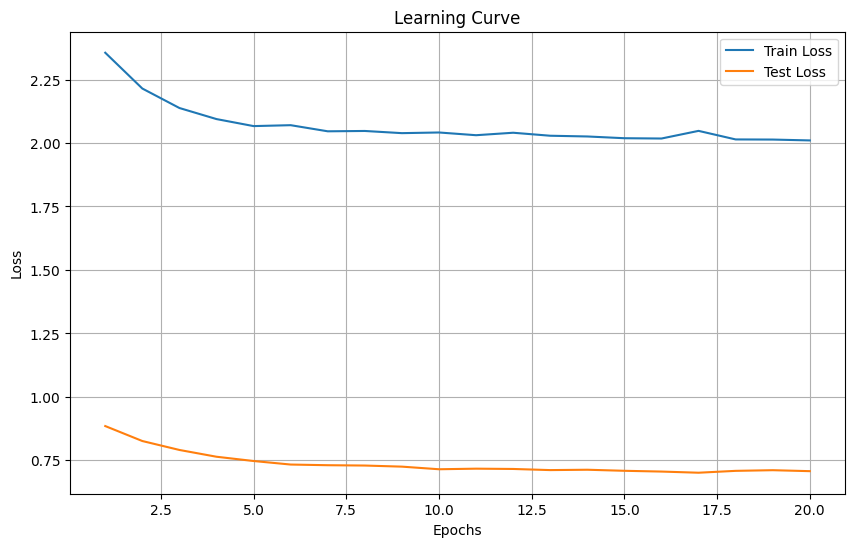

Epoch: 20, Train Loss: 2.0102, Test Loss: 0.7075


In [442]:
import torch
import torch.nn as nn

class SimpleLinearNet(nn.Module):
    def __init__(self, input_size):
        super(SimpleLinearNet, self).__init__()
        self.linear = nn.Linear(input_size, 1)
    def forward(self, x):
        return self.linear(x)

input_size = train[0][0].shape[0]
model = SimpleLinearNet(input_size)

criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

epochs = 20
from IPython.display import clear_output
import matplotlib.pyplot as plt


train_losses = []
test_losses = []


for epoch in range(epochs):
    model.train()
    total_loss = 0.0
    for batch_features, batch_labels in train_dataloader:
        predictions = torch.sigmoid(model(batch_features.float()))
        loss = criterion(predictions.flatten(), batch_labels.float())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    train_losses.append(total_loss)


    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for batch_features, batch_labels in test_dataloader:
            predictions = torch.sigmoid(model(batch_features.float()))
            loss = criterion(predictions.flatten(), batch_labels.float())
            test_loss += loss.item()
    test_losses.append(test_loss)

    if (epoch + 1) % 5 == 0:
        clear_output(True)
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, epoch + 2), train_losses, label="Train Loss")
        plt.plot(range(1, epoch + 2), test_losses, label="Test Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title("Learning Curve")
        plt.legend()
        plt.grid(True)
        plt.show()

        print(f"Epoch: {epoch + 1}, Train Loss: {total_loss:.4f}, Test Loss: {test_loss:.4f}")

# Нейросеть посложнее (с 1 скрытым слоем) с оптимизатором Adam

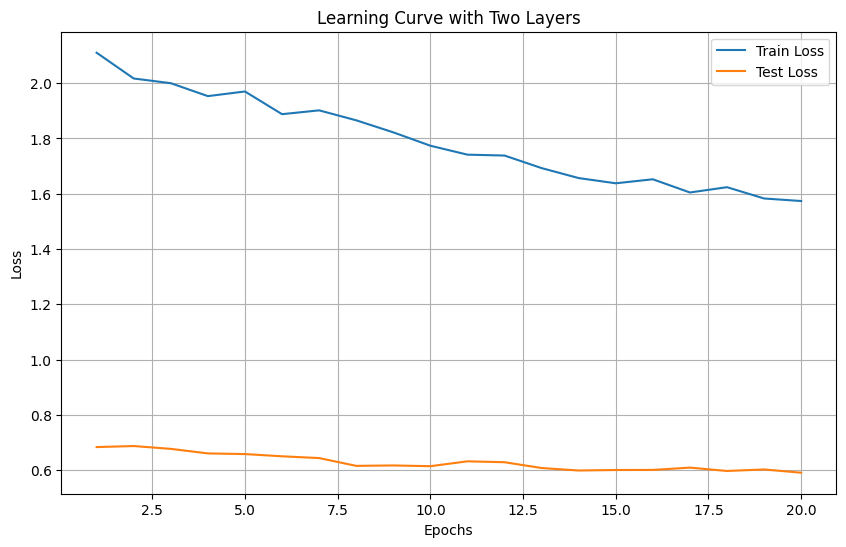

Epoch: 20, Train Loss: 1.5736, Test Loss: 0.5915


In [443]:
class NeuralNetWithTwoLayers(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNetWithTwoLayers, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.activation = nn.ReLU()
        self.output = nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = self.activation(self.hidden(x))
        return self.output(x)


input_size = train[0][0].shape[0]
hidden_size = 7
model = NeuralNetWithTwoLayers(input_size, hidden_size)

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)


epochs = 20
train_losses = []
test_losses = []

for epoch in range(epochs):
    model.train()
    total_loss = 0.0
    for batch_features, batch_labels in train_dataloader:
        predictions = torch.sigmoid(model(batch_features.float()))
        loss = criterion(predictions.flatten(), batch_labels.float())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    train_losses.append(total_loss)

    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for batch_features, batch_labels in test_dataloader:
            predictions = torch.sigmoid(model(batch_features.float()))
            loss = criterion(predictions.flatten(), batch_labels.float())
            test_loss += loss.item()
    test_losses.append(test_loss)

    if (epoch + 1) % 5 == 0:
        clear_output(True)
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, epoch + 2), train_losses, label="Train Loss")
        plt.plot(range(1, epoch + 2), test_losses, label="Test Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title("Learning Curve with Two Layers")
        plt.legend()
        plt.grid(True)
        plt.show()

        print(f"Epoch: {epoch + 1}, Train Loss: {total_loss:.4f}, Test Loss: {test_loss:.4f}")

# Нейросеть еще сложнее (с 3+ скрытыми слоями) с оптимизатором Adam

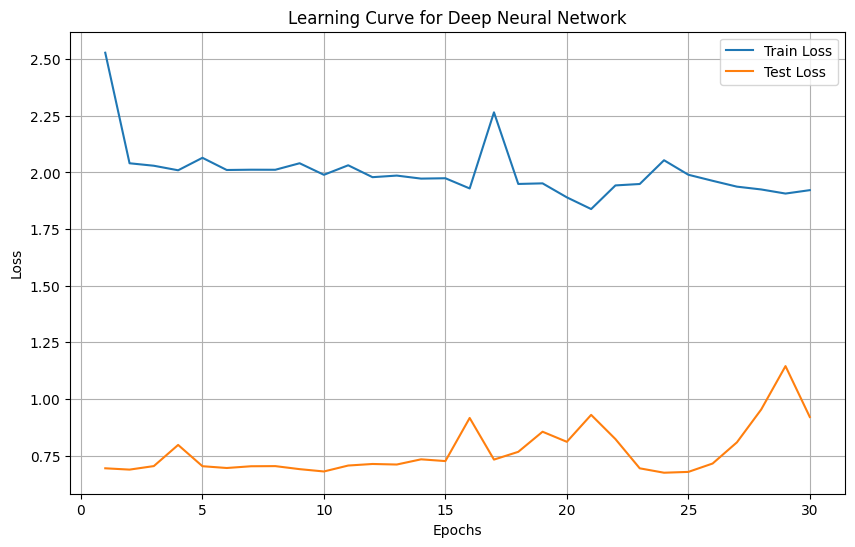

Epoch: 30, Train Loss: 1.9218, Test Loss: 0.9202


In [444]:
class SmarterNeuralNet(nn.Module):
    def __init__(self, input_size, hidden_sizes):
        super(SmarterNeuralNet, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, hidden_sizes[0]),
            nn.ReLU(),
            nn.Linear(hidden_sizes[0], hidden_sizes[1]),
            nn.ReLU(),
            nn.Linear(hidden_sizes[1], hidden_sizes[2]),
            nn.ReLU(),
            nn.Linear(hidden_sizes[2], 1)
        )

    def forward(self, x):
        return self.layers(x)


input_size = train[0][0].shape[0]
hidden_sizes = [64, 32, 16]
model = SmarterNeuralNet(input_size, hidden_sizes)


criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)


epochs = 30
train_losses = []
test_losses = []

for epoch in range(epochs):
    model.train()
    total_loss = 0.0
    for batch_features, batch_labels in train_dataloader:
        predictions = torch.sigmoid(model(batch_features.float()))
        loss = criterion(predictions.flatten(), batch_labels.float())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    train_losses.append(total_loss)


    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for batch_features, batch_labels in test_dataloader:
            predictions = torch.sigmoid(model(batch_features.float()))
            loss = criterion(predictions.flatten(), batch_labels.float())
            test_loss += loss.item()
    test_losses.append(test_loss)


    if (epoch + 1) % 5 == 0:
        clear_output(True)
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, epoch + 2), train_losses, label="Train Loss")
        plt.plot(range(1, epoch + 2), test_losses, label="Test Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title("Learning Curve for Deep Neural Network")
        plt.legend()
        plt.grid(True)
        plt.show()

        print(f"Epoch: {epoch + 1}, Train Loss: {total_loss:.4f}, Test Loss: {test_loss:.4f}")

In [445]:
from torch.utils.data import DataLoader


def calculate_accuracy(dataloader, model):
    correct = 0
    total = 0
    model.eval()
    with torch.no_grad():
        for batch_features, batch_labels in dataloader:
            predictions = torch.sigmoid(model(batch_features.float())).squeeze()
            predicted_classes = (predictions > 0.5).long()  # Классы: 1, если предсказание > 0.5, иначе 0
            correct += (predicted_classes == batch_labels.long()).sum().item()
            total += len(batch_labels)
    return correct / total


def evaluate_models():
    input_size = train[0][0].shape[0]

    simple_model = SimpleLinearNet(input_size)
    simple_model_accuracy_train = calculate_accuracy(train_dataloader, simple_model)
    simple_model_accuracy_test = calculate_accuracy(test_dataloader, simple_model)

    two_layer_model = NeuralNetWithTwoLayers(input_size, hidden_size=32)
    two_layer_model_accuracy_train = calculate_accuracy(train_dataloader, two_layer_model)
    two_layer_model_accuracy_test = calculate_accuracy(test_dataloader, two_layer_model)

    smarter_model = SmarterNeuralNet(input_size, hidden_sizes=[64, 32, 16])
    smarter_model_accuracy_train = calculate_accuracy(train_dataloader, smarter_model)
    smarter_model_accuracy_test = calculate_accuracy(test_dataloader, smarter_model)

    results = {
        "Model": ["Simple Linear Net", "Neural Net with Two Layers", "Smarter Neural Net"],
        "Train Accuracy": [
            simple_model_accuracy_train,
            two_layer_model_accuracy_train,
            smarter_model_accuracy_train
        ],
        "Test Accuracy": [
            simple_model_accuracy_test,
            two_layer_model_accuracy_test,
            smarter_model_accuracy_test
        ],
    }

    import pandas as pd
    results_df = pd.DataFrame(results)
    return results_df

print(evaluate_models())

                        Model  Train Accuracy  Test Accuracy
0           Simple Linear Net        0.462766       0.580645
1  Neural Net with Two Layers        0.414894       0.483871
2          Smarter Neural Net        0.531915       0.677419
